In [1]:
from src.ConditionalConvolutionVAE import*

/home/yubaes/anaconda3/envs/DL/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


EPOCH: 1.000	train_loss: 45907.629	train_kld: 153.996	train_recon: 45753.641	train_log_var: -0.160	train_mean: -0.002	val_loss: 45180.078	val_kld: 476.918	val_recon: 44703.160	val_log_var: -0.458	val_mean: -0.025	(21.39s - 192.48s remaining)


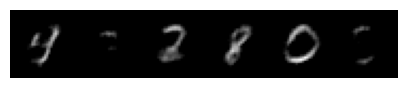

EPOCH: 2.000	train_loss: 44900.707	train_kld: 556.275	train_recon: 44344.430	train_log_var: -0.547	train_mean: -0.005	val_loss: 44412.125	val_kld: 618.686	val_recon: 43793.441	val_log_var: -0.618	val_mean: -0.004	(41.90s - 167.62s remaining)


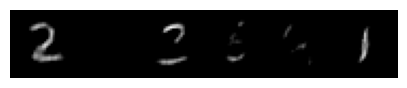

EPOCH: 3.000	train_loss: 44605.484	train_kld: 669.878	train_recon: 43935.602	train_log_var: -0.660	train_mean: -0.002	val_loss: 44251.883	val_kld: 688.221	val_recon: 43563.664	val_log_var: -0.694	val_mean: -0.007	(62.77s - 146.46s remaining)


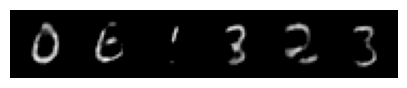

EPOCH: 4.000	train_loss: 44482.910	train_kld: 707.099	train_recon: 43775.809	train_log_var: -0.696	train_mean: -0.001	val_loss: 44159.801	val_kld: 752.839	val_recon: 43406.969	val_log_var: -0.742	val_mean: 0.000	(84.12s - 126.17s remaining)


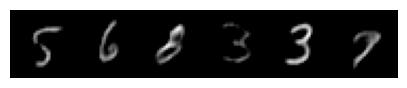

EPOCH: 5.000	train_loss: 44413.980	train_kld: 722.557	train_recon: 43691.422	train_log_var: -0.711	train_mean: -0.000	val_loss: 44107.352	val_kld: 707.381	val_recon: 43399.973	val_log_var: -0.713	val_mean: 0.006	(105.16s - 105.16s remaining)


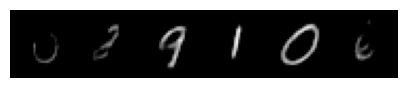

EPOCH: 6.000	train_loss: 44367.547	train_kld: 736.648	train_recon: 43630.898	train_log_var: -0.724	train_mean: -0.000	val_loss: 44061.676	val_kld: 716.476	val_recon: 43345.199	val_log_var: -0.724	val_mean: 0.006	(127.07s - 84.71s remaining)


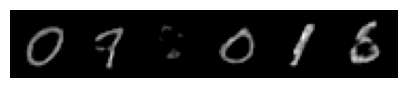

EPOCH: 7.000	train_loss: 44331.754	train_kld: 746.442	train_recon: 43585.312	train_log_var: -0.733	train_mean: 0.000	val_loss: 44063.758	val_kld: 720.932	val_recon: 43342.824	val_log_var: -0.731	val_mean: -0.006	(148.95s - 63.84s remaining)


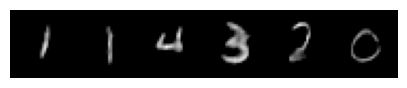

EPOCH: 8.000	train_loss: 44304.266	train_kld: 751.616	train_recon: 43552.648	train_log_var: -0.738	train_mean: -0.000	val_loss: 44021.801	val_kld: 735.358	val_recon: 43286.441	val_log_var: -0.732	val_mean: -0.002	(170.49s - 42.62s remaining)


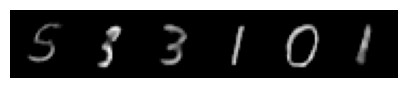

EPOCH: 9.000	train_loss: 44279.957	train_kld: 760.040	train_recon: 43519.914	train_log_var: -0.746	train_mean: 0.000	val_loss: 44014.617	val_kld: 767.161	val_recon: 43247.457	val_log_var: -0.756	val_mean: -0.006	(192.27s - 21.36s remaining)


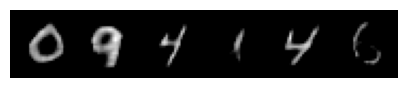

EPOCH: 10.000	train_loss: 44260.910	train_kld: 766.396	train_recon: 43494.516	train_log_var: -0.752	train_mean: 0.000	val_loss: 43969.750	val_kld: 786.145	val_recon: 43183.598	val_log_var: -0.780	val_mean: 0.004	(213.60s - 0.00s remaining)


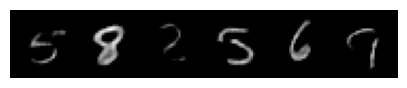

In [2]:
model = CCVAE(32,10).to(device)
n_epochs = 10
log = Report(n_epochs)

for epoch in range(n_epochs):
    N = len(model.train)
    for batch_idx, (data, target) in enumerate(model.train):
        c = torch.nn.functional.one_hot(target,10)
        loss, recon, kld, log_var, mean = model.train_batch(data,c)
        pos = epoch + (1+batch_idx)/N
        log.record(pos, train_loss=loss, train_kld=kld, train_recon=recon, train_log_var=log_var, train_mean=mean, end='\r')
        
    N = len(model.test)
    for batch_idx, (data,target) in enumerate(model.test):
        c = torch.nn.functional.one_hot(target)
        loss, recon, kld, log_var, mean = model.validate_batch(data,c)
        pos = epoch + (1+batch_idx)/N
        log.record(pos, val_loss=loss, val_kld=kld, val_recon=recon, val_log_var=log_var, val_mean=mean, end='\r')
        
    log.report_avgs(epoch+1)
    with torch.no_grad():
        z = torch.randn(6, 32).to(device)
        target = torch.randint(10,(6,))
        c = torch.nn.functional.one_hot(target,10)
        z = torch.cat((z.to(device),c.float().to(device)),dim=1)
        sample = model.decoder(z).to(device)
        images = make_grid(sample.view(6, 1, 28, 28),normalize=True).permute(1,2,0)
        show(images)

100%|██████████| 111/111 [00:00<00:00, 377.94it/s]


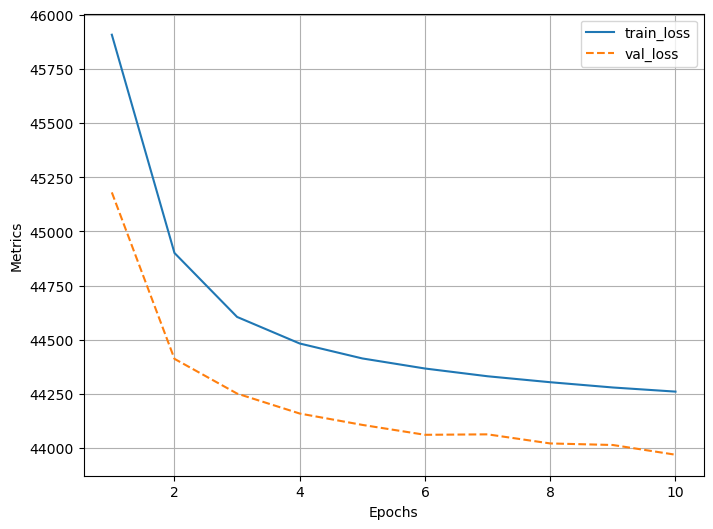

In [3]:
log.plot_epochs(['train_loss','val_loss'])